In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<img src= 'https://cdn.wccftech.com/wp-content/uploads/2021/07/Spotify-740x417.jpg' height =400, width =350>

<a href="https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes">Dataset link</a>

In [2]:
df = pd.read_csv('spotify.csv')
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [8]:
df.drop('Unnamed: 0',axis=1, inplace= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [10]:
df.shape

(2017, 16)

In [13]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [66]:
# df[df['song_title'].duplicated(keep=False)]

In [14]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### Top 5 most Popular Artists

In [23]:
top_5_artists = df.groupby('artist')['song_title'].count().sort_values(ascending= False)[:5]
top_5_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

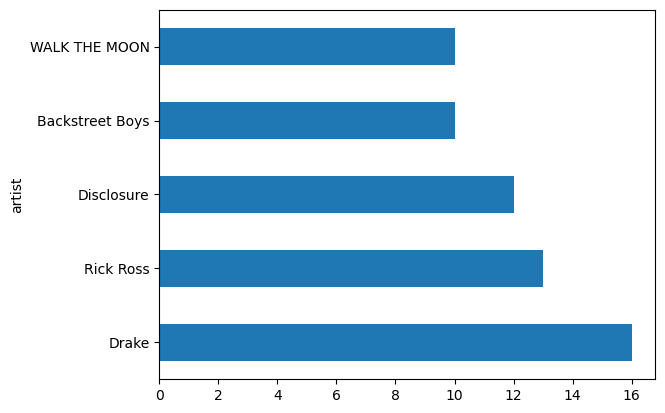

In [36]:
top_5_artists.plot.barh()

# Alternative Way
# sns.barplot(x=top_5_artists.index , y=top_5_artists)
# plt.xticks(rotation = 30)

plt.show()

### Top 5 loudest tracks

In [55]:
# we will keep ascending = True because the more -ve the number is the more louder the song 
loud_track = df[['song_title', 'loudness']].sort_values(by = 'loudness', ascending = True)[:5]
loud_track

,song_title,loudness
1594,"Lyric Pieces, Book I Op. 12: I. Arietta",-33.097
1596,"8 Fantasiestücke, Op.12 : 1. Des Abends",-31.367
1598,"Piano Quartet in E flat, Op.47: 3. Andante can...",-31.082
1531,"I Was So Young, and You Were So Beautiful",-30.447
1549,Eleanor,-29.460


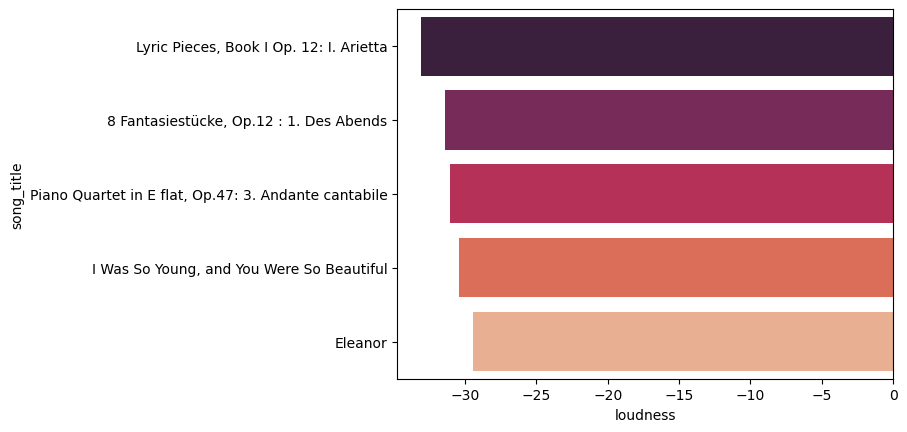

In [58]:
# loud_track.plot.barh()
sns.barplot(x='loudness'  , y= 'song_title', data = loud_track, palette='rocket', orient='h')
plt.show()

### Artist with most Danceable songs

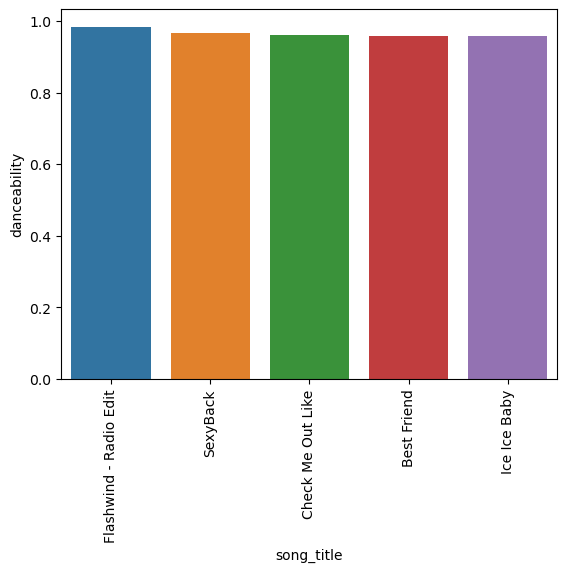

In [69]:
Dance = df[['song_title', 'danceability']].sort_values(by = 'danceability', ascending = False)[:5]
sns.barplot(data= Dance, x= 'song_title', y='danceability')
plt.xticks(rotation = 90)
plt.show()

### Top 10 Instrumentaless Tracks

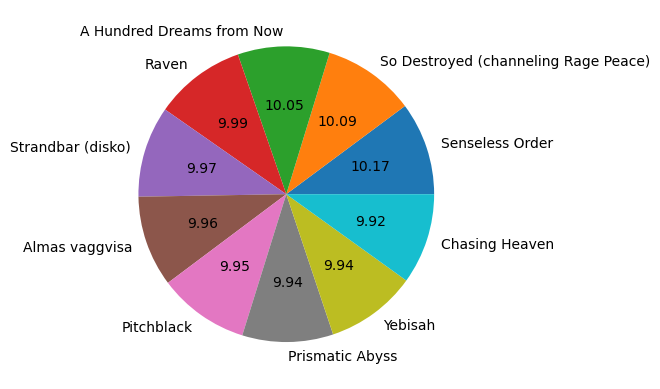

In [78]:
Dance = df[['song_title', 'instrumentalness']].sort_values(by = 'instrumentalness', ascending = False)[:10]
plt.pie(data= Dance, x='instrumentalness' , labels=Dance['song_title'], autopct='%.2f')
plt.xticks(rotation = 90)
plt.show()

### Multiple feature plots

In [80]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

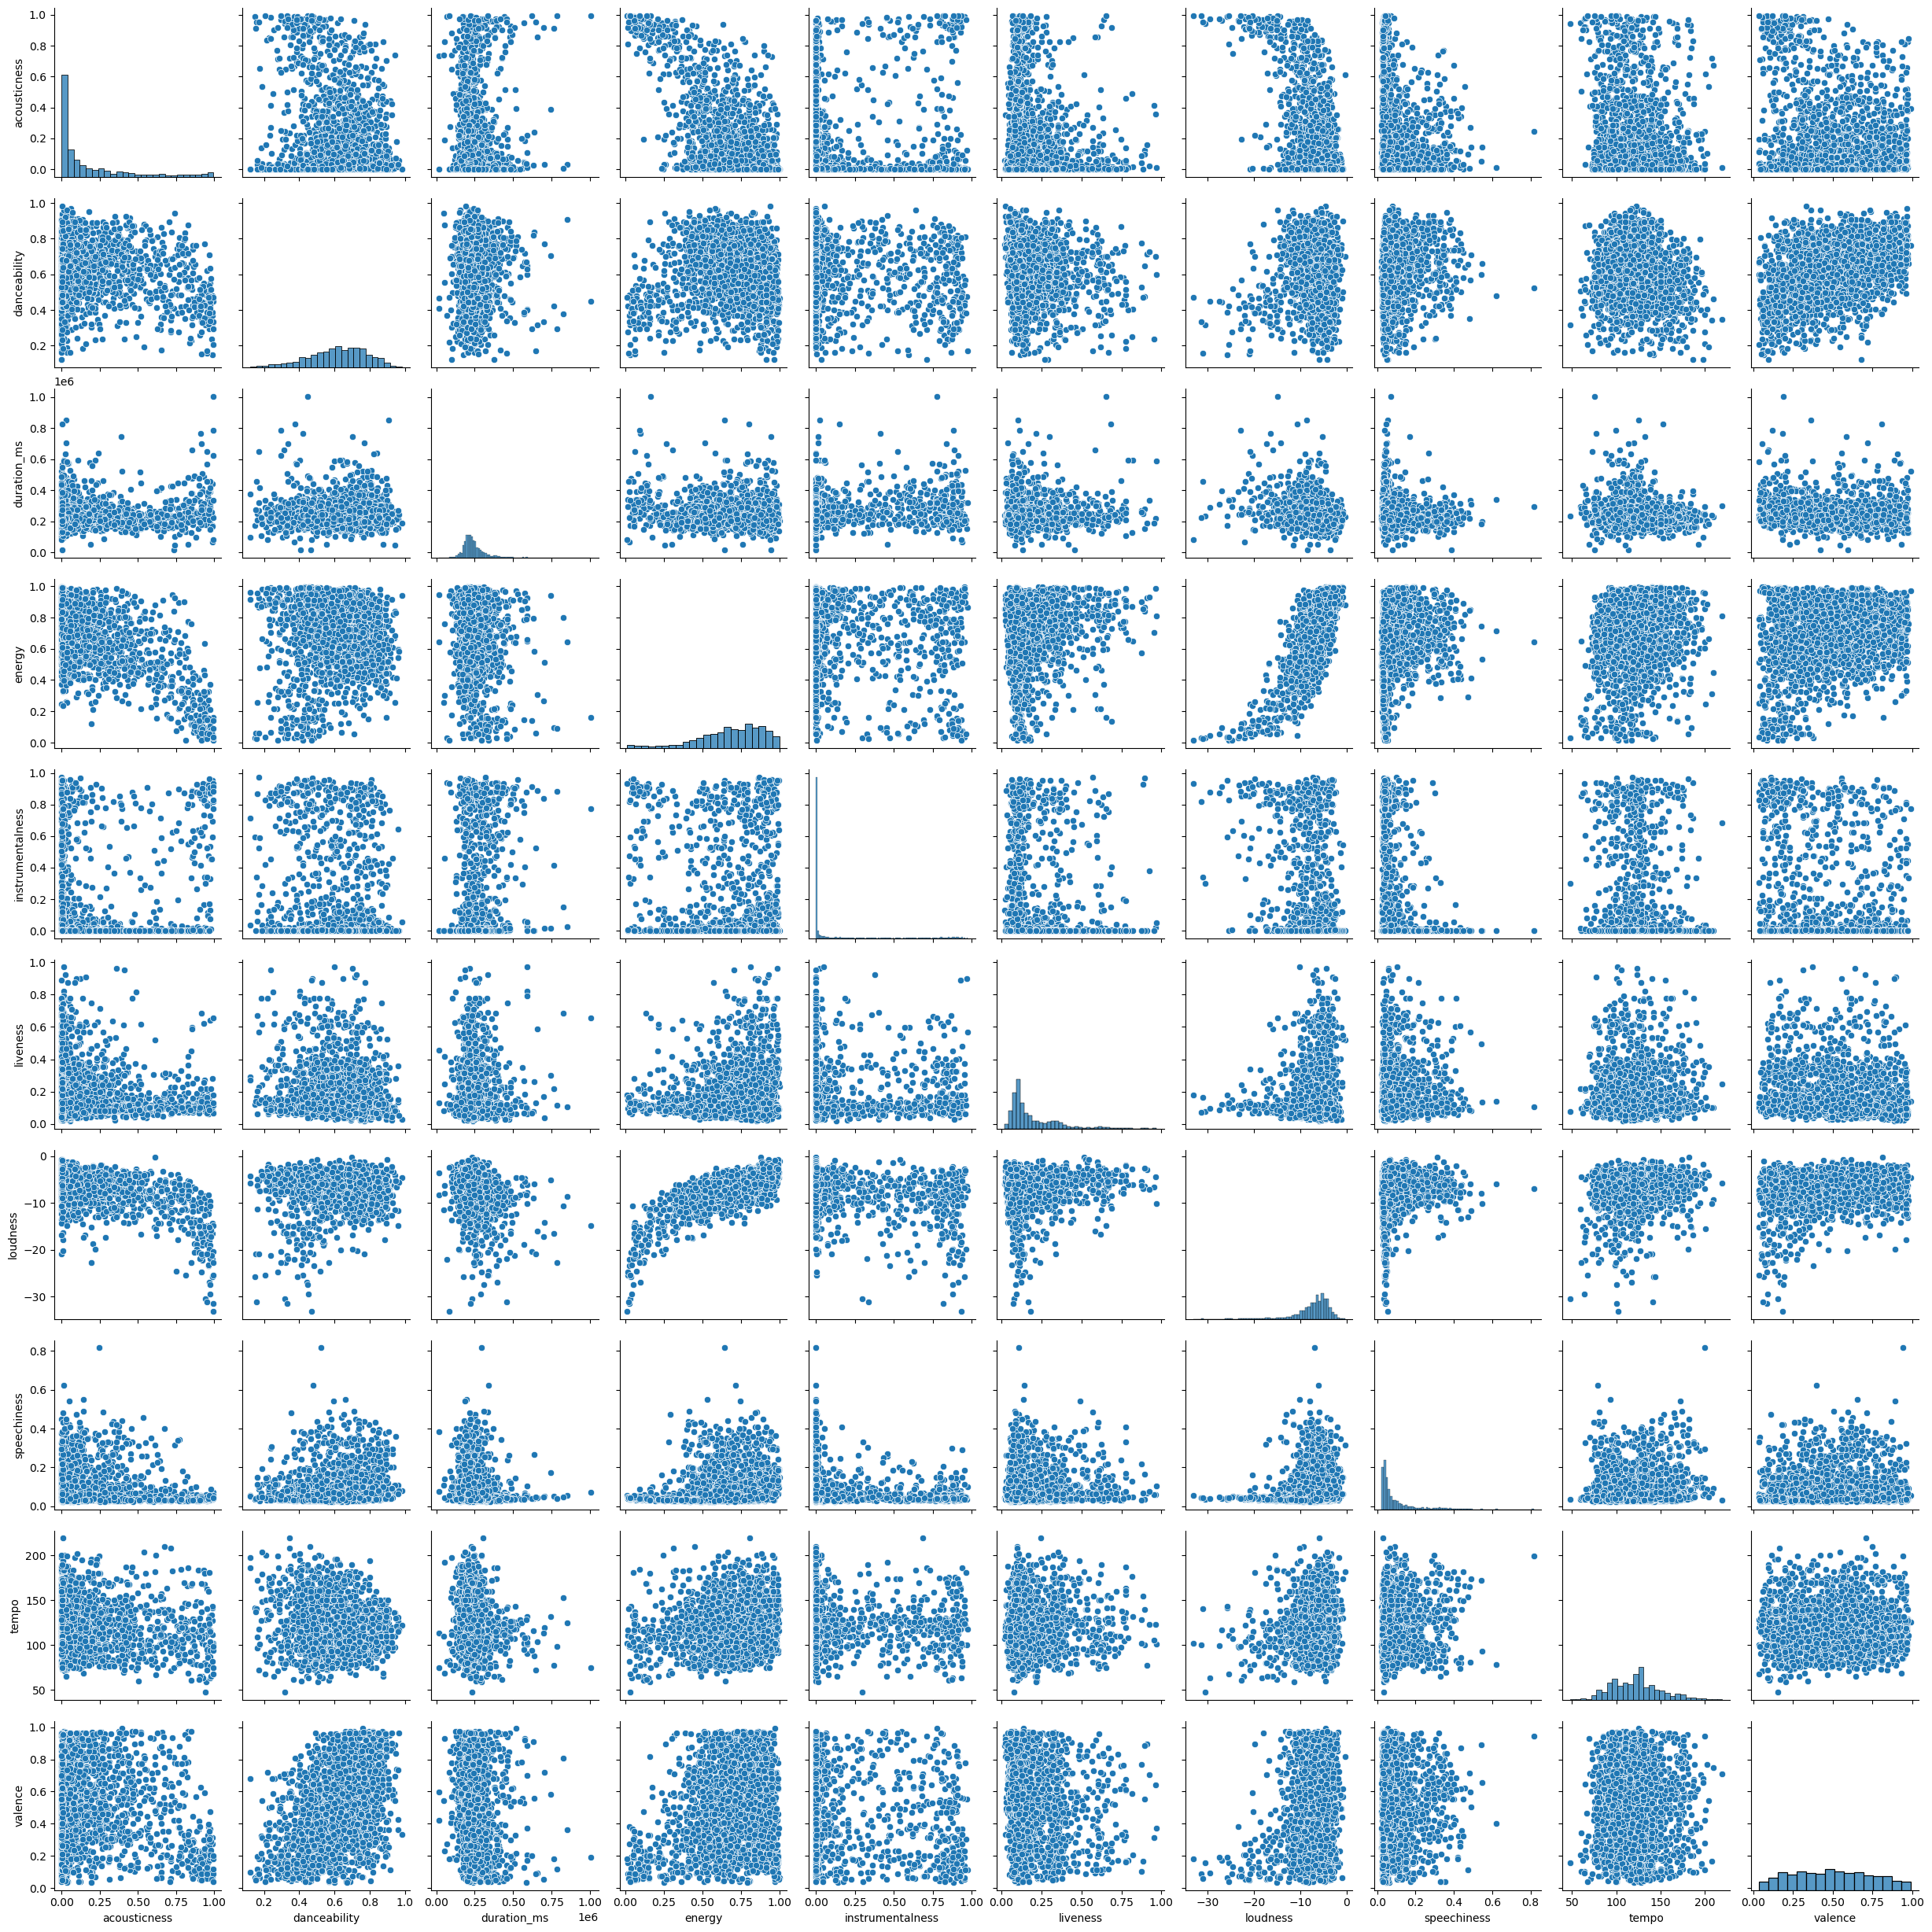

In [84]:
sns.pairplot(df[['acousticness','danceability','duration_ms', 'energy','instrumentalness',
                        'liveness', 'loudness','speechiness', 'tempo','valence', ]])
plt.show()

In [85]:
list_col =['acousticness','danceability','duration_ms', 'energy','instrumentalness',
                        'liveness', 'loudness','speechiness', 'tempo','valence', ]

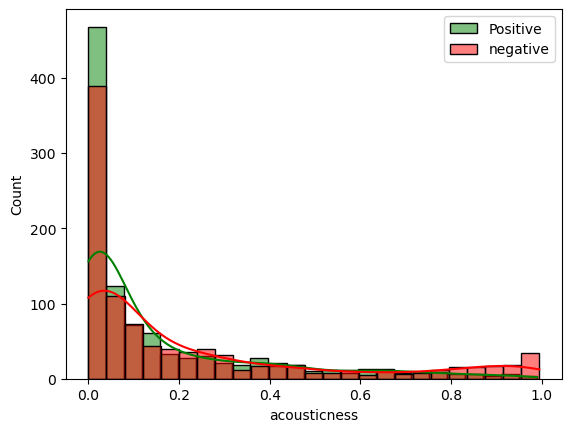

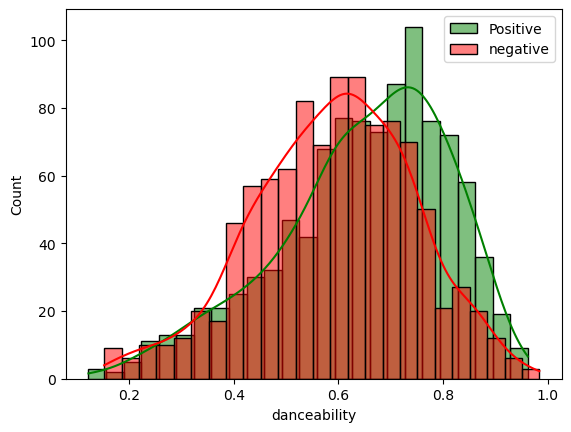

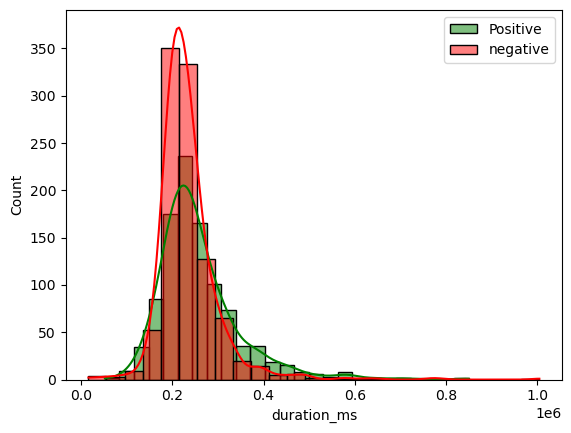

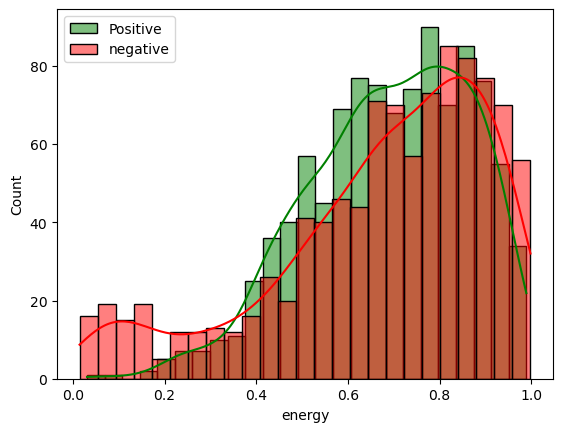

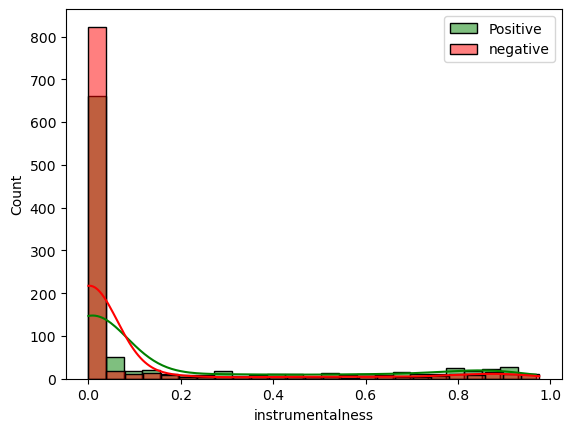

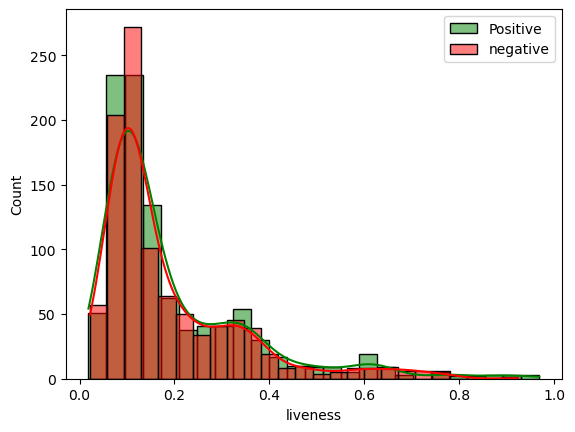

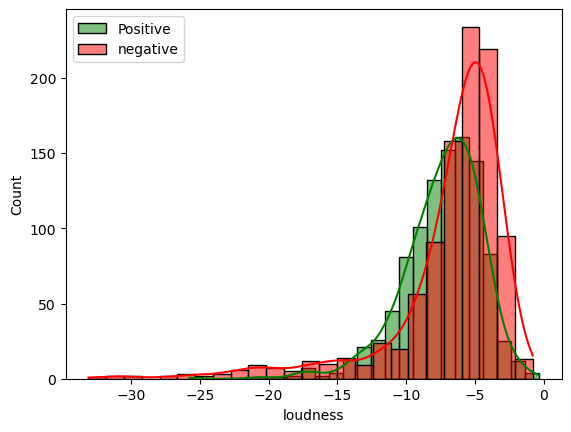

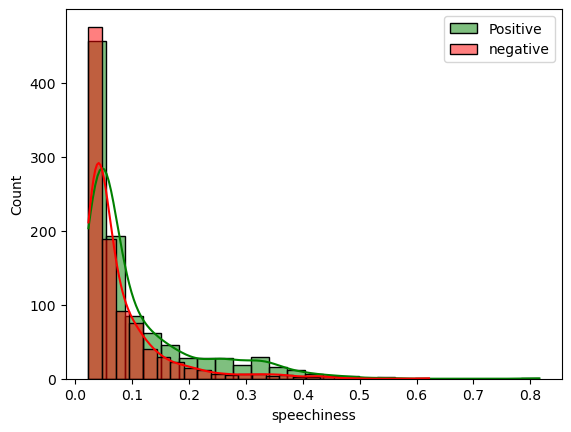

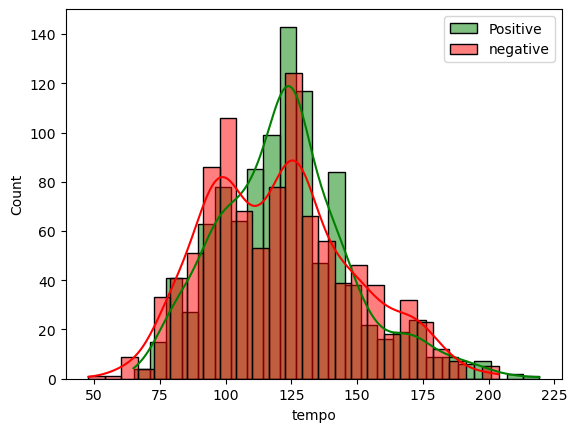

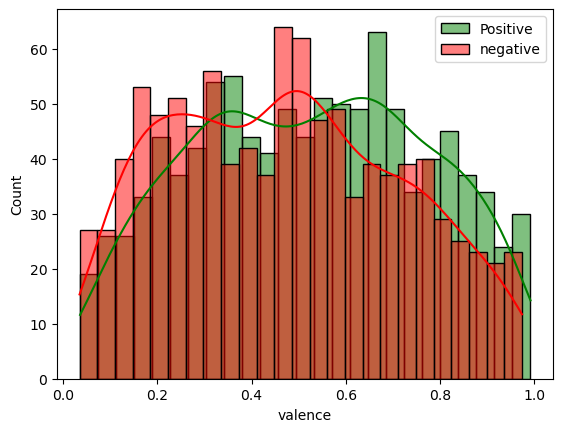

In [95]:
for feature_col in list_col:
    pos_data = df[df['target']==1][feature_col]
    neg_data = df[df['target']==0][feature_col]
    
    sns.histplot(pos_data , bins= 25, label= 'Positive', color='g', kde=True)
    sns.histplot(neg_data , bins= 25, color='r', label ='negative', kde=True)
    
    plt.legend()
    plt.show()